# Análisis de Cáncer de Mama Wisconsin - Clasificación

Este notebook presenta un análisis completo del dataset de cáncer de mama de Wisconsin, organizado en 5 fases:

1. **Fase de Análisis Exploratorio de Datos (EDA)**
2. **Fase de Preprocesamiento**
3. **Fase de Modelado**
4. **Fase de Optimización**
5. **Fase de Ensamblado**

## Importación de Librerías

In [ ]:
# Librerías para manipulación de datos
import pandas as pd
import numpy as np

# Librerías para visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Librerías para machine learning
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_validate
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
import xgboost as xgb
from xgboost import XGBClassifier

# Librerías para evaluación
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix,
                           precision_score, recall_score, f1_score, roc_auc_score, roc_curve)

# Configuración de visualización
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (10, 6)

# FASE 1: Análisis Exploratorio de Datos (EDA) Realizado por Andrea Barro

## 1.1 Carga y Descripción de los Datos

In [ ]:
# Cargar el archivo
df = pd.read_csv("wdbc.csv", header=None)

# Asignar nombres de columnas
column_names = ['ID', 'Diagnosis'] + [
    'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean',
    'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean',
    'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se',
    'smoothness_se', 'compactness_se', 'concavity_se', 'concave_points_se',
    'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst',
    'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst',
    'concavity_worst', 'concave_points_worst', 'symmetry_worst',
    'fractal_dimension_worst'
]
df.columns = column_names

print(f"Dimensiones del dataset: {df.shape}")
df.head()

Dimensiones del dataset: (569, 32)


,ID,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# Información básica del dataset
print("INFORMACIÓN GENERAL DEL DATASET")
print("=" * 50)
print(f"Dimensiones: {df.shape}")
print(f"Tipos de datos:\n{df.dtypes.value_counts()}")
print(f"\nValores nulos por columna:\n{df.isnull().sum().sum()} (total)")
print(f"\nClases en el diagnóstico:\n{df['Diagnosis'].value_counts()}")
print(f"\nPorcentaje de clases:")
print(df['Diagnosis'].value_counts(normalize=True) * 100)

# Información detallada
df.info()

INFORMACIÓN GENERAL DEL DATASET
Dimensiones: (569, 32)
Tipos de datos:
float64    30
int64       1
object      1
Name: count, dtype: int64

Valores nulos por columna:
0 (total)

Clases en el diagnóstico:
Diagnosis
B    357
M    212
Name: count, dtype: int64

Porcentaje de clases:
Diagnosis
B    62.741652
M    37.258348
Name: proportion, dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       569 non-null    int64  
 1   Diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 

In [ ]:
# Estadísticas descriptivas
print("ESTADÍSTICAS DESCRIPTIVAS")
print("=" * 50)
df.describe().T

ESTADÍSTICAS DESCRIPTIVAS


,count,mean,std,min,25%,50%,75%,max
ID,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave_points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


## 1.2 Visualizaciones Exploratorias

/tmp/ipython-input-7-3694719712.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Diagnosis', palette='pastel')


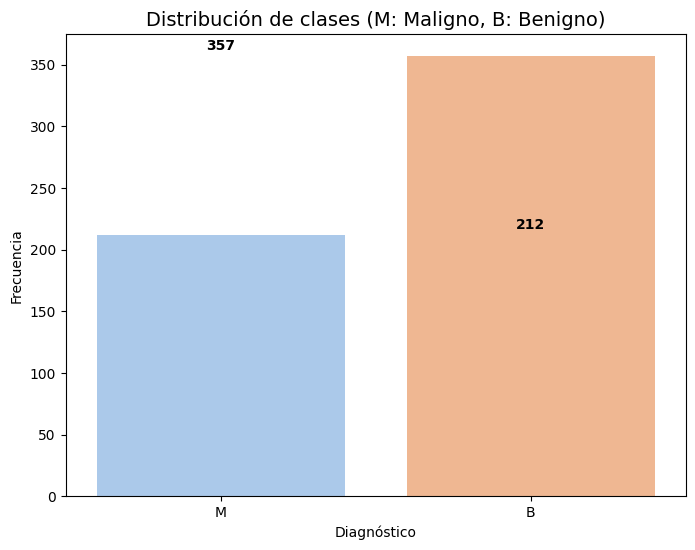

In [ ]:
# Distribución de clases
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Diagnosis', palette='pastel')
plt.title("Distribución de clases (M: Maligno, B: Benigno)", fontsize=14)
plt.xlabel("Diagnóstico")
plt.ylabel("Frecuencia")
for i, v in enumerate(df['Diagnosis'].value_counts().values):
    plt.text(i, v + 5, str(v), ha='center', fontweight='bold')
plt.show()

<Figure size 1600x1000 with 0 Axes>

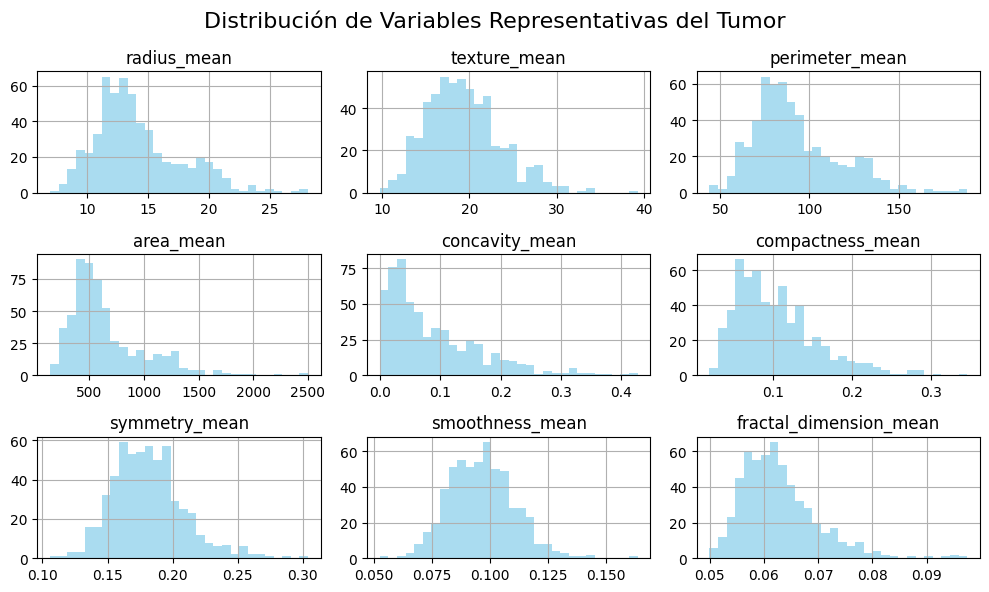

In [ ]:
# Histogramas de variables representativas
features_representativas = [
    'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
    'concavity_mean', 'compactness_mean', 'symmetry_mean', 'smoothness_mean',
    'fractal_dimension_mean'
]

plt.figure(figsize=(16, 10))
df[features_representativas].hist(bins=30, color='skyblue', alpha=0.7)
plt.suptitle("Distribución de Variables Representativas del Tumor", fontsize=16)
plt.tight_layout()
plt.show()

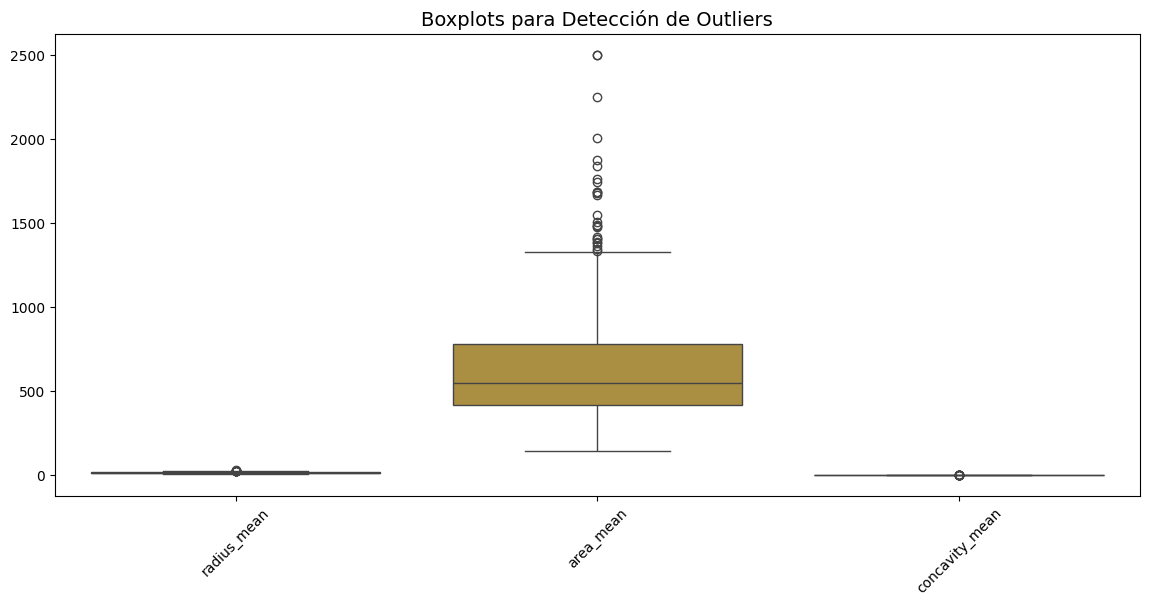

In [ ]:
# Boxplots para detección de outliers
plt.figure(figsize=(14, 6))
sns.boxplot(data=df[['radius_mean', 'area_mean', 'concavity_mean']])
plt.title("Boxplots para Detección de Outliers", fontsize=14)
plt.xticks(rotation=45)
plt.show()

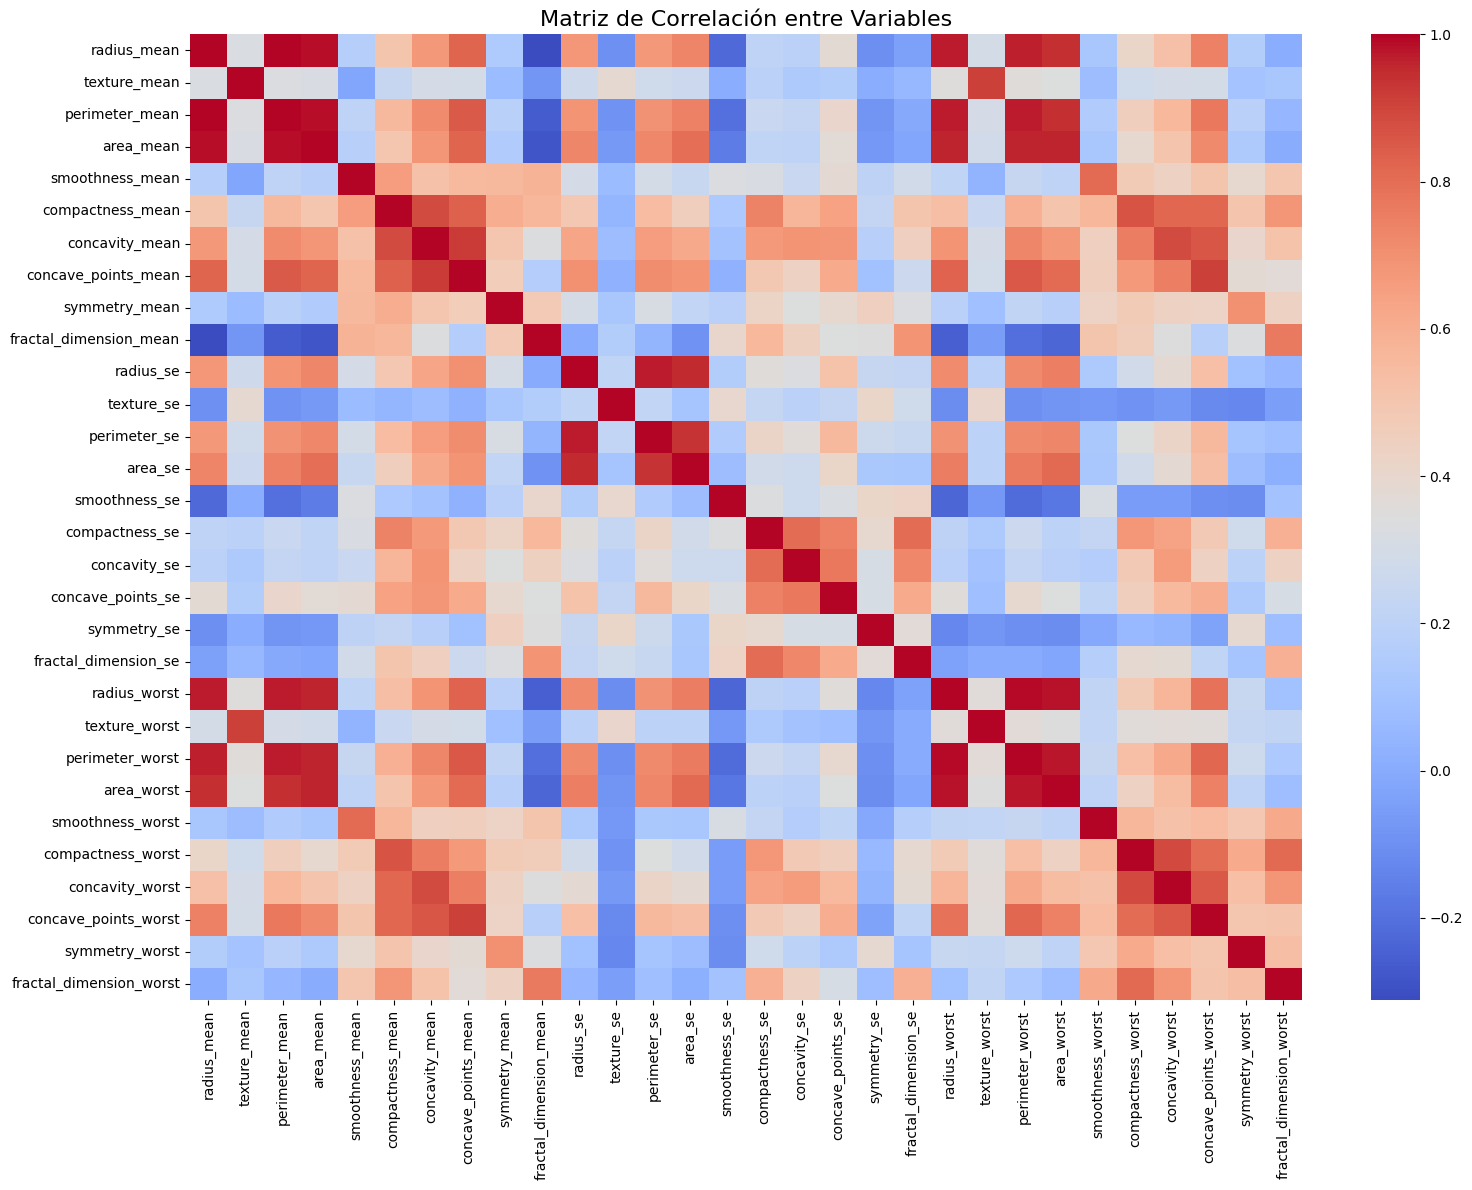

In [ ]:
# Matriz de correlación
plt.figure(figsize=(16, 12))
correlation = df.iloc[:, 2:].corr()
sns.heatmap(correlation, cmap="coolwarm", annot=False, fmt='.2f')
plt.title("Matriz de Correlación entre Variables", fontsize=16)
plt.tight_layout()
plt.show()

/tmp/ipython-input-11-4177848648.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Diagnosis', y=var, palette='Set2', ax=axes[i])
/tmp/ipython-input-11-4177848648.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Diagnosis', y=var, palette='Set2', ax=axes[i])
/tmp/ipython-input-11-4177848648.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Diagnosis', y=var, palette='Set2', ax=axes[i])


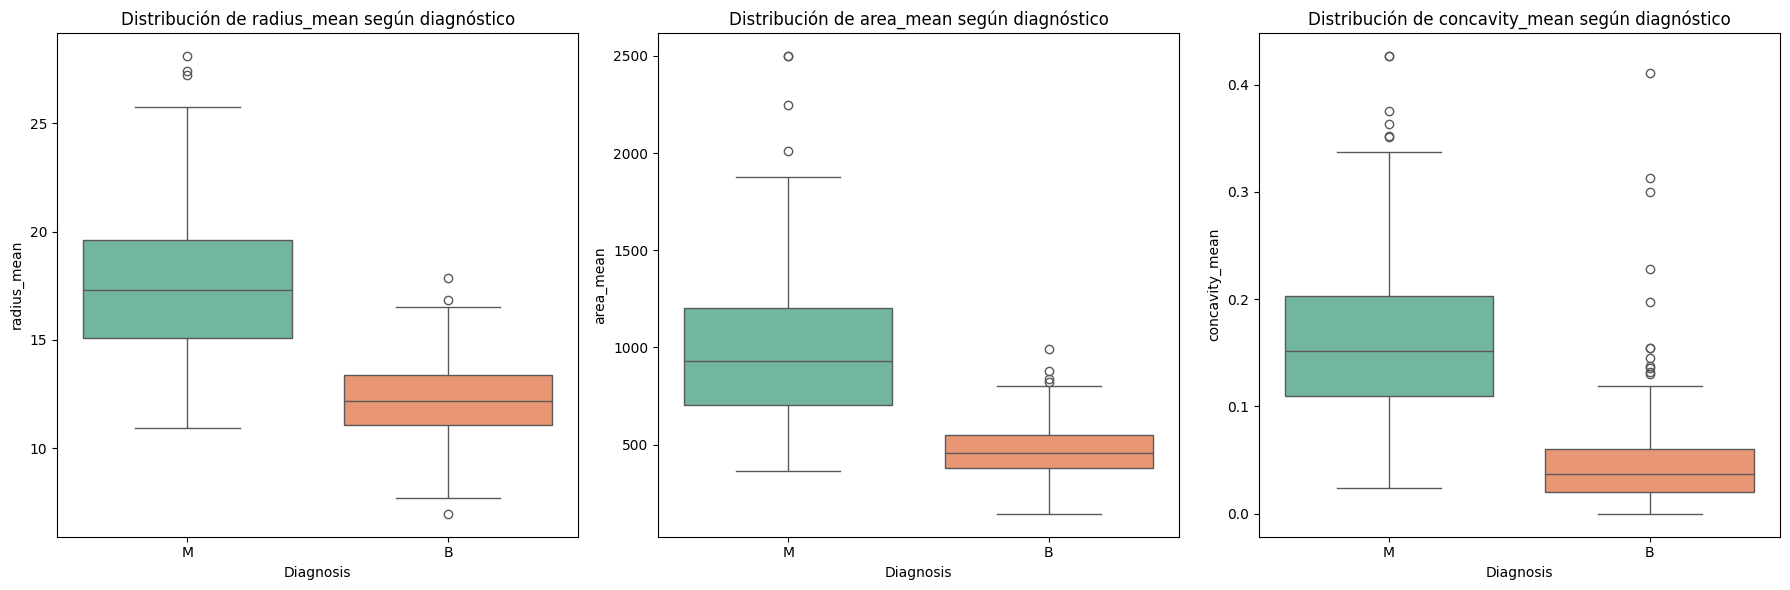

In [ ]:
# Comparación de variables por diagnóstico
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

variables_clave = ['radius_mean', 'area_mean', 'concavity_mean']
for i, var in enumerate(variables_clave):
    sns.boxplot(data=df, x='Diagnosis', y=var, palette='Set2', ax=axes[i])
    axes[i].set_title(f'Distribución de {var} según diagnóstico')

plt.tight_layout()
plt.show()

In [ ]:
# Comparar medias por clase
print("COMPARACIÓN DE MEDIAS POR CLASE")
print("=" * 50)
print("Variables con mayor diferencia entre clases:")
comparison = df.groupby('Diagnosis').mean().T.sort_values(by='M', ascending=False)
print(comparison.head(10))

COMPARACIÓN DE MEDIAS POR CLASE
Variables con mayor diferencia entre clases:
Diagnosis                   B             M
ID               2.654382e+07  3.681805e+07
area_worst       5.588994e+02  1.422286e+03
area_mean        4.627902e+02  9.783764e+02
perimeter_worst  8.700594e+01  1.413703e+02
perimeter_mean   7.807541e+01  1.153654e+02
area_se          2.113515e+01  7.267241e+01
texture_worst    2.351507e+01  2.931821e+01
texture_mean     1.791476e+01  2.160491e+01
radius_worst     1.337980e+01  2.113481e+01
radius_mean      1.214652e+01  1.746283e+01


In [ ]:
# Análisis de outliers
def resumen_outliers_iqr(X):
    """Función para analizar outliers usando el método IQR"""
    total_filas = len(X)
    resumen = []

    for col in X.columns:
        Q1 = X[col].quantile(0.25)
        Q3 = X[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Contar outliers
        num_outliers = ((X[col] < lower_bound) | (X[col] > upper_bound)).sum()
        pct_outliers = 100 * num_outliers / total_filas

        resumen.append({
            'columna': col,
            'cantidad_outliers': num_outliers,
            'porcentaje_outliers': round(pct_outliers, 2)
        })

    resumen_df = pd.DataFrame(resumen)
    return resumen_df

# Aplicar análisis de outliers solo a variables numéricas
X_temp = df.iloc[:, 2:]  # Variables numéricas
resumen_outliers = resumen_outliers_iqr(X_temp)
print("ANÁLISIS DE OUTLIERS")
print("=" * 50)
print(resumen_outliers.head(10))

ANÁLISIS DE OUTLIERS
                  columna  cantidad_outliers  porcentaje_outliers
0             radius_mean                 14                 2.46
1            texture_mean                  7                 1.23
2          perimeter_mean                 13                 2.28
3               area_mean                 25                 4.39
4         smoothness_mean                  6                 1.05
5        compactness_mean                 16                 2.81
6          concavity_mean                 18                 3.16
7     concave_points_mean                 10                 1.76
8           symmetry_mean                 15                 2.64
9  fractal_dimension_mean                 15                 2.64


# FASE 2: Preprocesamiento Realizado por Sebastian Guzman

**Conclusión del EDA:** El porcentaje de outliers es bajo para casi todas las columnas. Además, bajo el contexto del cáncer de mama es preferible trabajar con datos reales, por lo que no se realizará ninguna transformación relacionada con outliers.

## 2.1 Preparación de Variables

In [ ]:
# Separar características (X) y variable objetivo (y)
X = df.iloc[:, 2:]  # Features desde la columna 2 en adelante
y = df.iloc[:, 1]   # Target es la columna 1 (Diagnosis)

print("Variables separadas:")
print(f"Características (X): {X.shape}")
print(f"Variable objetivo (y): {y.shape}")
print(f"Tipos de datos en X: {X.dtypes.nunique()} únicos")
print(f"Tipo de datos en y: {y.dtype}")

Variables separadas:
Características (X): (569, 30)
Variable objetivo (y): (569,)
Tipos de datos en X: 1 únicos
Tipo de datos en y: object


## 2.2 Codificación de Variables

In [ ]:
# Codificación de la variable objetivo
if y.dtype == 'object':
    le = LabelEncoder()
    y_encoded = le.fit_transform(y)
    print("CODIFICACIÓN DE VARIABLE OBJETIVO")
    print("=" * 50)
    # Mostrar el mapeo
    mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print("Mapeo de clases:")
    for original, encoded in mapping.items():
        print(f"  {original} → {encoded}")
    y = y_encoded # Usar la variable codificada para modelado
else:
    print("La variable objetivo ya es numérica.")

print(f"\nDistribución de clases codificadas:")
unique, counts = np.unique(y, return_counts=True)
for val, count in zip(unique, counts):
    print(f"  Clase {val}: {count} muestras")

CODIFICACIÓN DE VARIABLE OBJETIVO
Mapeo de clases:
  B → 0
  M → 1

Distribución de clases codificadas:
  Clase 0: 357 muestras
  Clase 1: 212 muestras


## 2.3 Escalamiento de Variables

In [ ]:
# Estandarización de las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

print("ESCALAMIENTO COMPLETADO")
print("=" * 50)
print(f"Forma original: {X.shape}")
print(f"Forma escalada: {X_scaled.shape}")
print("\nEstadísticas después del escalamiento:")
print(f"Media (debería estar cerca de 0): {X_scaled.mean().mean():.6f}")
print(f"Desviación estándar (debería estar cerca de 1): {X_scaled.std().mean():.6f}")

# Mostrar algunas estadísticas
print("\nPrimeras 5 variables escaladas:")
X_scaled.head()

ESCALAMIENTO COMPLETADO
Forma original: (569, 30)
Forma escalada: (569, 30)

Estadísticas después del escalamiento:
Media (debería estar cerca de 0): -0.000000
Desviación estándar (debería estar cerca de 1): 1.000880

Primeras 5 variables escaladas:


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


## 2.4 Reducción de Dimensiones (PCA)

Al tener 30 columnas, realizaremos una reducción de dimensiones para mantener el 95% de la varianza explicada.

In [ ]:
# Aplicar PCA manteniendo 95% de la varianza
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)
X_pca = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])

print("REDUCCIÓN DE DIMENSIONES (PCA)")
print("=" * 50)
print(f"Dimensiones originales: {X_scaled.shape}")
print(f"Dimensiones después de PCA: {X_pca.shape}")
print(f"Varianza explicada total: {pca.explained_variance_ratio_.sum():.4f}")
print(f"Número de componentes: {pca.n_components_}")

# Mostrar la varianza explicada por los primeros componentes
print("\nVarianza explicada por los primeros 10 componentes:")
for i, var_exp in enumerate(pca.explained_variance_ratio_[:10]):
    print(f"  PC{i+1}: {var_exp:.4f} ({var_exp*100:.2f}%)")

X_pca.head()

REDUCCIÓN DE DIMENSIONES (PCA)
Dimensiones originales: (569, 30)
Dimensiones después de PCA: (569, 10)
Varianza explicada total: 0.9516
Número de componentes: 10

Varianza explicada por los primeros 10 componentes:
  PC1: 0.4427 (44.27%)
  PC2: 0.1897 (18.97%)
  PC3: 0.0939 (9.39%)
  PC4: 0.0660 (6.60%)
  PC5: 0.0550 (5.50%)
  PC6: 0.0402 (4.02%)
  PC7: 0.0225 (2.25%)
  PC8: 0.0159 (1.59%)
  PC9: 0.0139 (1.39%)
  PC10: 0.0117 (1.17%)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,9.192837,1.948583,-1.123166,-3.633731,1.195110,1.411424,2.159370,-0.398407,-0.157118,-0.877402
1,2.387802,-3.768172,-0.529293,-1.118264,-0.621775,0.028656,0.013358,0.240988,-0.711905,1.106995
2,5.733896,-1.075174,-0.551748,-0.912083,0.177086,0.541452,-0.668166,0.097374,0.024066,0.454275
3,7.122953,10.275589,-3.232790,-0.152547,2.960878,3.053422,1.429911,1.059565,-1.405440,-1.116975
4,3.935302,-1.948072,1.389767,-2.940639,-0.546747,-1.226495,-0.936213,0.636376,-0.263805,0.377704


## 2.5 División Entrenamiento/Prueba

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y,
    test_size=0.2,
    random_state=42,
    stratify=y,  # Mantener la proporción de clases
    shuffle=True
)

print("DIVISIÓN DE DATOS COMPLETADA")
print("=" * 50)
print(f"Conjunto de entrenamiento: {X_train.shape}")
print(f"Conjunto de prueba: {X_test.shape}")
print(f"Variable objetivo entrenamiento: {y_train.shape}")
print(f"Variable objetivo prueba: {y_test.shape}")

# Verificar distribución de clases
print("\nDistribución de clases en entrenamiento:")
unique_train, counts_train = np.unique(y_train, return_counts=True)
for val, count in zip(unique_train, counts_train):
    print(f"  Clase {val}: {count} muestras ({count/len(y_train)*100:.1f}%)")

print("\nDistribución de clases en prueba:")
unique_test, counts_test = np.unique(y_test, return_counts=True)
for val, count in zip(unique_test, counts_test):
    print(f"  Clase {val}: {count} muestras ({count/len(y_test)*100:.1f}%)")

DIVISIÓN DE DATOS COMPLETADA
Conjunto de entrenamiento: (455, 10)
Conjunto de prueba: (114, 10)
Variable objetivo entrenamiento: (455,)
Variable objetivo prueba: (114,)

Distribución de clases en entrenamiento:
  Clase 0: 285 muestras (62.6%)
  Clase 1: 170 muestras (37.4%)

Distribución de clases en prueba:
  Clase 0: 72 muestras (63.2%)
  Clase 1: 42 muestras (36.8%)


# FASE 3: Modelado Base

En esta fase entrenaremos y evaluaremos 4 modelos diferentes con configuraciones base.

## 3.1 Entrenamiento de Modelos Base Realizado por todos los integrantes

In [ ]:
# Diccionario para almacenar resultados de modelos
resultados_modelos = {}

print("ENTRENAMIENTO DE MODELOS BASE")
print("=" * 60)

# 1. SVM (Support Vector Machine) Jose Mesarina
print("\n 1 Entrenando SVM...")
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

resultados_modelos['SVM'] = {
    'modelo': svm_model,
    'predicciones': y_pred_svm,
    'accuracy': accuracy_score(y_test, y_pred_svm),
    'precision': precision_score(y_test, y_pred_svm),
    'recall': recall_score(y_test, y_pred_svm),
    'f1': f1_score(y_test, y_pred_svm)
}
print(f" SVM completado - Accuracy: {resultados_modelos['SVM']['accuracy']:.4f}")

# 2. Árbol de Decisión Andrea Barro
print("\n 2 Entrenando Árbol de Decisión...")
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

resultados_modelos['Decision Tree'] = {
    'modelo': dt_model,
    'predicciones': y_pred_dt,
    'accuracy': accuracy_score(y_test, y_pred_dt),
    'precision': precision_score(y_test, y_pred_dt),
    'recall': recall_score(y_test, y_pred_dt),
    'f1': f1_score(y_test, y_pred_dt)
}
print(f" Árbol de Decisión completado - Accuracy: {resultados_modelos['Decision Tree']['accuracy']:.4f}")

# 3. Random Forest Rodrigo Cisneros
print("\n 3 Entrenando Random Forest...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

resultados_modelos['Random Forest'] = {
    'modelo': rf_model,
    'predicciones': y_pred_rf,
    'accuracy': accuracy_score(y_test, y_pred_rf),
    'precision': precision_score(y_test, y_pred_rf),
    'recall': recall_score(y_test, y_pred_rf),
    'f1': f1_score(y_test, y_pred_rf)
}
print(f" Random Forest completado - Accuracy: {resultados_modelos['Random Forest']['accuracy']:.4f}")

# 4. XGBoost Sebastian Guzman
print("\n 4 Entrenando XGBoost...")
xgb_model = XGBClassifier(objective='binary:logistic', use_label_encoder=False,
                         eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

resultados_modelos['XGBoost'] = {
    'modelo': xgb_model,
    'predicciones': y_pred_xgb,
    'accuracy': accuracy_score(y_test, y_pred_xgb),
    'precision': precision_score(y_test, y_pred_xgb),
    'recall': recall_score(y_test, y_pred_xgb),
    'f1': f1_score(y_test, y_pred_xgb)
}
print(f" XGBoost completado - Accuracy: {resultados_modelos['XGBoost']['accuracy']:.4f}")

print("\n TODOS LOS MODELOS BASE ENTRENADOS")

ENTRENAMIENTO DE MODELOS BASE

 1 Entrenando SVM...
 SVM completado - Accuracy: 0.9649

 2 Entrenando Árbol de Decisión...
 Árbol de Decisión completado - Accuracy: 0.9211

 3 Entrenando Random Forest...
 Random Forest completado - Accuracy: 0.9386

 4 Entrenando XGBoost...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:48:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


 XGBoost completado - Accuracy: 0.9737

 TODOS LOS MODELOS BASE ENTRENADOS


## 3.2 Evaluación de Modelos Base

COMPARACIÓN DE RENDIMIENTO - MODELOS BASE
       Modelo  Accuracy  Precision  Recall  F1-Score
          SVM    0.9649     0.9750  0.9286    0.9512
Decision Tree    0.9211     0.9024  0.8810    0.8916
Random Forest    0.9386     0.9268  0.9048    0.9157
      XGBoost    0.9737     1.0000  0.9286    0.9630

 Mejor modelo base (por Accuracy): XGBoost
   Accuracy: 0.9737


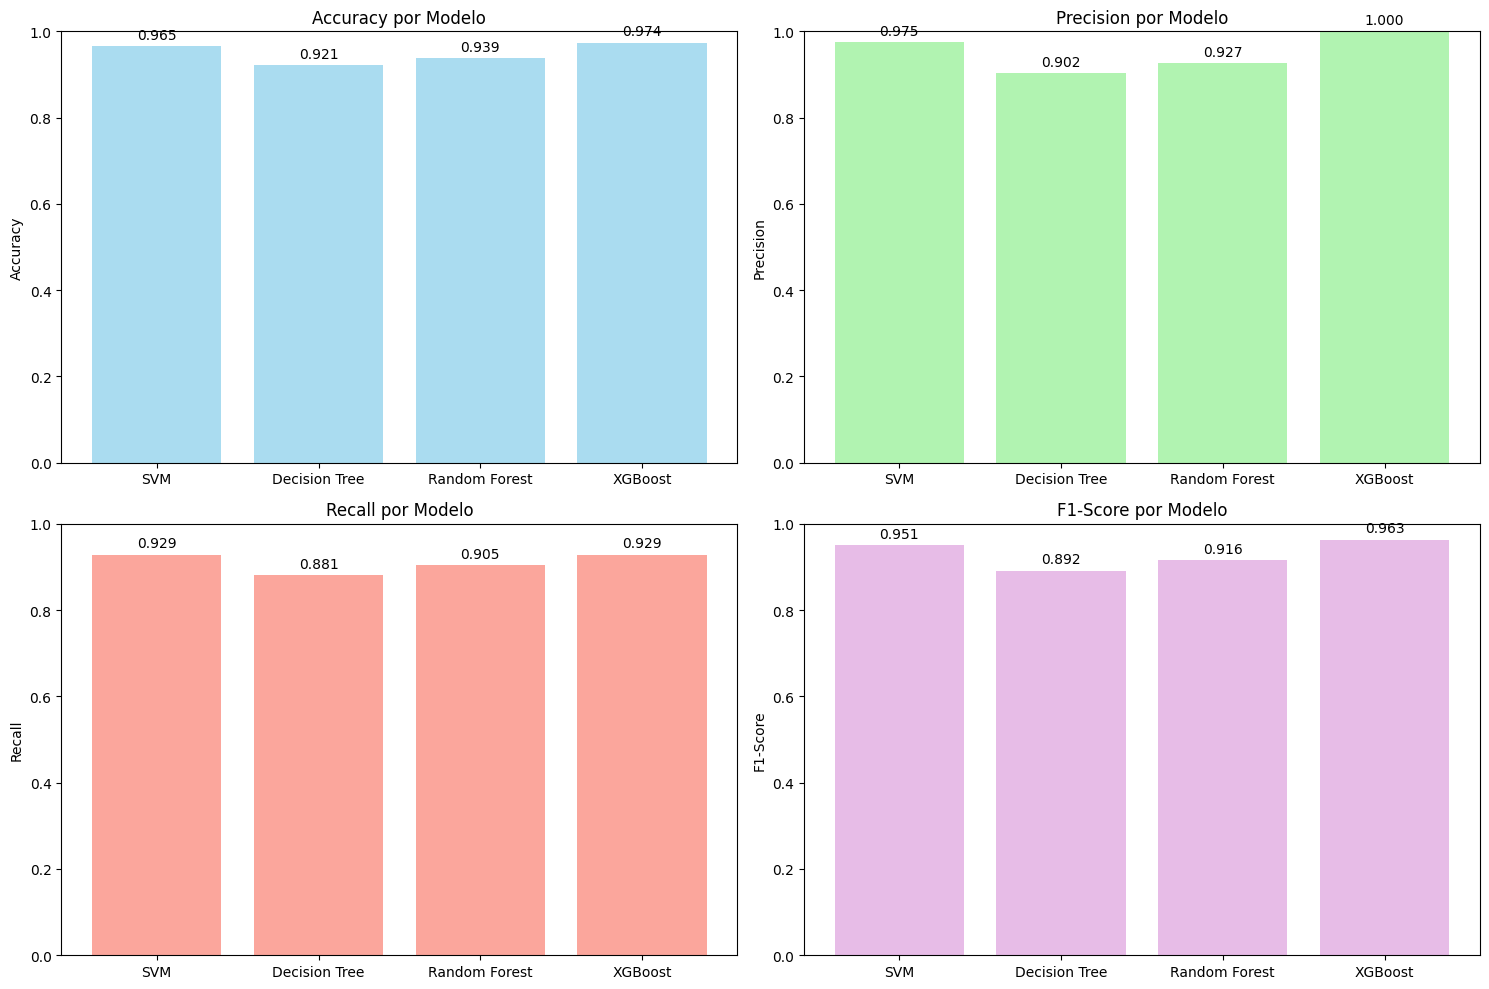

In [ ]:
# Tabla comparativa de rendimiento
print("COMPARACIÓN DE RENDIMIENTO - MODELOS BASE")
print("=" * 70)

# Crear DataFrame con resultados
resultados_df = pd.DataFrame({
    'Modelo': list(resultados_modelos.keys()),
    'Accuracy': [resultados_modelos[modelo]['accuracy'] for modelo in resultados_modelos],
    'Precision': [resultados_modelos[modelo]['precision'] for modelo in resultados_modelos],
    'Recall': [resultados_modelos[modelo]['recall'] for modelo in resultados_modelos],
    'F1-Score': [resultados_modelos[modelo]['f1'] for modelo in resultados_modelos]
})

# Formatear números
for col in ['Accuracy', 'Precision', 'Recall', 'F1-Score']:
    resultados_df[col] = resultados_df[col].round(4)

print(resultados_df.to_string(index=False))

# Encontrar el mejor modelo
mejor_modelo = resultados_df.loc[resultados_df['Accuracy'].idxmax(), 'Modelo']
print(f"\n Mejor modelo base (por Accuracy): {mejor_modelo}")
print(f"   Accuracy: {resultados_df.loc[resultados_df['Accuracy'].idxmax(), 'Accuracy']}")

# Visualizar comparación
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
metricas = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
colores = ['skyblue', 'lightgreen', 'salmon', 'plum']

for i, metrica in enumerate(metricas):
    ax = axes[i//2, i%2]
    bars = ax.bar(resultados_df['Modelo'], resultados_df[metrica], color=colores[i], alpha=0.7)
    ax.set_title(f'{metrica} por Modelo')
    ax.set_ylabel(metrica)
    ax.set_ylim(0, 1)

    # Añadir valores en las barras
    for bar, valor in zip(bars, resultados_df[metrica]):
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                f'{valor:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [ ]:
# Evaluación detallada para cada modelo
print("\n EVALUACIÓN DETALLADA POR MODELO")
print("=" * 70)

for nombre_modelo in resultados_modelos:
    print(f"\n--- {nombre_modelo} ---")
    predicciones = resultados_modelos[nombre_modelo]['predicciones']

    print(f"Accuracy: {accuracy_score(y_test, predicciones):.4f}")
    print("\nMatriz de Confusión:")
    print(confusion_matrix(y_test, predicciones))
    print("\nReporte de Clasificación:")
    print(classification_report(y_test, predicciones, target_names=['Benigno', 'Maligno']))


 EVALUACIÓN DETALLADA POR MODELO

--- SVM ---
Accuracy: 0.9649

Matriz de Confusión:
[[71  1]
 [ 3 39]]

Reporte de Clasificación:
              precision    recall  f1-score   support

     Benigno       0.96      0.99      0.97        72
     Maligno       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114


--- Decision Tree ---
Accuracy: 0.9211

Matriz de Confusión:
[[68  4]
 [ 5 37]]

Reporte de Clasificación:
              precision    recall  f1-score   support

     Benigno       0.93      0.94      0.94        72
     Maligno       0.90      0.88      0.89        42

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.91       114
weighted avg       0.92      0.92      0.92       114


--- Random Forest ---
Accuracy: 0.9386

Matriz de Confusión:
[[69  3]
 [ 4 38]]

Reporte de Clasificación

# FASE 4: Optimización de Modelos Realizado por 3 integrantes Andrea Barro, Sebastian Guzman, Jose Mesarina

En esta fase optimizaremos los hiperparámetros de los modelos más prometedores.

In [ ]:
## 4.2 Optimización de XGBoost Sebastian Guzman
# GridSearchCV para XGBoost
print(" OPTIMIZACIÓN DE HIPERPARÁMETROS - XGBOOST")
print("=" * 60)

# Definir la rejilla de parámetros
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.1, 0.2],
    'subsample': [0.7, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.8],
    'gamma': [0.1],
    'min_child_weight': [1, 3],
    'reg_lambda': [1, 1.5]
}

# Configurar GridSearchCV
xgb_base = XGBClassifier(eval_metric='logloss', random_state=42, use_label_encoder=False)
grid_search_xgb = GridSearchCV(
    estimator=xgb_base,
    param_grid=param_grid_xgb,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=1
)

print("Ejecutando búsqueda de hiperparámetros...")
grid_search_xgb.fit(X_train, y_train)

# Resultados
print(f" Mejor score CV: {grid_search_xgb.best_score_:.4f}")
print(f" Mejores parámetros: {grid_search_xgb.best_params_}")

# Evaluar modelo optimizado
best_xgb = grid_search_xgb.best_estimator_
y_pred_xgb_tuned = best_xgb.predict(X_test)
accuracy_tuned = accuracy_score(y_test, y_pred_xgb_tuned)

print(f"\n COMPARACIÓN DE RENDIMIENTO XGBoost:")
print(f"Modelo base:       {resultados_modelos['XGBoost']['accuracy']:.6f}")
print(f"Modelo optimizado: {accuracy_tuned:.6f}")
print(f"Mejora:           {accuracy_tuned - resultados_modelos['XGBoost']['accuracy']:+.6f}")

# Métricas completas del modelo optimizado
print(f"\nMétricas del modelo XGBoost optimizado:")
print(f"Accuracy:  {accuracy_score(y_test, y_pred_xgb_tuned):.6f}")
print(f"Precision: {precision_score(y_test, y_pred_xgb_tuned):.6f}")
print(f"Recall:    {recall_score(y_test, y_pred_xgb_tuned):.6f}")
print(f"F1-score:  {f1_score(y_test, y_pred_xgb_tuned):.6f}")

print("\nMatriz de confusión XGBoost optimizado:")
print(confusion_matrix(y_test, y_pred_xgb_tuned))

 OPTIMIZACIÓN DE HIPERPARÁMETROS - XGBOOST
Ejecutando búsqueda de hiperparámetros...
Fitting 5 folds for each of 192 candidates, totalling 960 fits
 Mejor score CV: 0.9758
 Mejores parámetros: {'colsample_bytree': 0.6, 'gamma': 0.1, 'learning_rate': 0.2, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 200, 'reg_lambda': 1, 'subsample': 0.7}

 COMPARACIÓN DE RENDIMIENTO XGBoost:
Modelo base:       0.973684
Modelo optimizado: 0.947368
Mejora:           -0.026316

Métricas del modelo XGBoost optimizado:
Accuracy:  0.947368
Precision: 0.928571
Recall:    0.928571
F1-score:  0.928571

Matriz de confusión XGBoost optimizado:
[[69  3]
 [ 3 39]]


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [01:48:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
## 4.2 Optimización de SVM Jose Mesarina
# GridSearchCV para SVM
print("\n OPTIMIZACIÓN DE HIPERPARÁMETROS - SVM")
print("=" * 60)

# Definir la rejilla de parámetros
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.1, 1],
    'kernel': ['linear', 'rbf']
}

# Configurar GridSearchCV
svm_base = SVC(random_state=42)
grid_search_svm = GridSearchCV(
    estimator=svm_base,
    param_grid=param_grid_svm,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=1
)

print("Ejecutando búsqueda de hiperparámetros...")
grid_search_svm.fit(X_train, y_train)

# Resultados
print(f" Mejor score CV: {grid_search_svm.best_score_:.4f}")
print(f" Mejores parámetros: {grid_search_svm.best_params_}")

# Evaluar modelo optimizado
best_svm = grid_search_svm.best_estimator_
y_pred_svm_tuned = best_svm.predict(X_test)
accuracy_tuned = accuracy_score(y_test, y_pred_svm_tuned)

print(f"\n COMPARACIÓN DE RENDIMIENTO SVM:")
print(f"Modelo base:       {resultados_modelos['SVM']['accuracy']:.6f}")
print(f"Modelo optimizado: {accuracy_tuned:.6f}")
print(f"Mejora:           {accuracy_tuned - resultados_modelos['SVM']['accuracy']:+.6f}")

# Métricas completas del modelo optimizado
print(f"\nMétricas del modelo SVM optimizado:")
print(f"Accuracy:  {accuracy_score(y_test, y_pred_svm_tuned):.6f}")
print(f"Precision: {precision_score(y_test, y_pred_svm_tuned):.6f}")
print(f"Recall:    {recall_score(y_test, y_pred_svm_tuned):.6f}")
print(f"F1-score:  {f1_score(y_test, y_pred_svm_tuned):.6f}")

print("\nMatriz de confusión SVM optimizado:")
print(confusion_matrix(y_test, y_pred_svm_tuned))


 OPTIMIZACIÓN DE HIPERPARÁMETROS - SVM
Ejecutando búsqueda de hiperparámetros...
Fitting 5 folds for each of 32 candidates, totalling 160 fits
 Mejor score CV: 0.9714
 Mejores parámetros: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}

 COMPARACIÓN DE RENDIMIENTO SVM:
Modelo base:       0.964912
Modelo optimizado: 0.982456
Mejora:           +0.017544

Métricas del modelo SVM optimizado:
Accuracy:  0.982456
Precision: 1.000000
Recall:    0.952381
F1-score:  0.975610

Matriz de confusión SVM optimizado:
[[72  0]
 [ 2 40]]


In [ ]:
## 4.3 Optimización de Random Forest Andrea Barro
# GridSearchCV para Random Forest
print("\n OPTIMIZACIÓN DE HIPERPARÁMETROS - Random Forest")
print("=" * 60)

# Definir la rejilla de parámetros
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Configurar GridSearchCV
rf_base = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(
    estimator=rf_base,
    param_grid=param_grid_rf,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=1
)

print("Ejecutando búsqueda de hiperparámetros...")
grid_search_rf.fit(X_train, y_train)

# Resultados
print(f" Mejor score CV: {grid_search_rf.best_score_:.4f}")
print(f" Mejores parámetros: {grid_search_rf.best_params_}")

# Evaluar modelo optimizado
best_rf = grid_search_rf.best_estimator_
y_pred_rf_tuned = best_rf.predict(X_test)
accuracy_tuned = accuracy_score(y_test, y_pred_rf_tuned)

print(f"\n COMPARACIÓN DE RENDIMIENTO Random Forest:")
print(f"Modelo base:       {resultados_modelos['Random Forest']['accuracy']:.6f}")
print(f"Modelo optimizado: {accuracy_tuned:.6f}")
print(f"Mejora:           {accuracy_tuned - resultados_modelos['Random Forest']['accuracy']:+.6f}")

# Métricas completas del modelo optimizado
print(f"\nMétricas del modelo Random Forest optimizado:")
print(f"Accuracy:  {accuracy_score(y_test, y_pred_rf_tuned):.6f}")
print(f"Precision: {precision_score(y_test, y_pred_rf_tuned):.6f}")
print(f"Recall:    {recall_score(y_test, y_pred_rf_tuned):.6f}")
print(f"F1-score:  {f1_score(y_test, y_pred_rf_tuned):.6f}")

print("\nMatriz de confusión Random Forest optimizado:")
print(confusion_matrix(y_test, y_pred_rf_tuned))


 OPTIMIZACIÓN DE HIPERPARÁMETROS - Random Forest
Ejecutando búsqueda de hiperparámetros...
Fitting 5 folds for each of 162 candidates, totalling 810 fits
 Mejor score CV: 0.9648
 Mejores parámetros: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}

 COMPARACIÓN DE RENDIMIENTO Random Forest:
Modelo base:       0.938596
Modelo optimizado: 0.947368
Mejora:           +0.008772

Métricas del modelo Random Forest optimizado:
Accuracy:  0.947368
Precision: 0.950000
Recall:    0.904762
F1-score:  0.926829

Matriz de confusión Random Forest optimizado:
[[70  2]
 [ 4 38]]


In [ ]:
## 4.4 Optimización de Decision Tree Andrea Barro
# GridSearchCV para Decision Tree
print("\n OPTIMIZACIÓN DE HIPERPARÁMETROS - Decision Tree")
print("=" * 60)

# Definir la rejilla de parámetros
param_grid_dt = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6],
    'criterion': ['gini', 'entropy']
}

# Configurar GridSearchCV
dt_base = DecisionTreeClassifier(random_state=42)
grid_search_dt = GridSearchCV(
    estimator=dt_base,
    param_grid=param_grid_dt,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=1
)

print("Ejecutando búsqueda de hiperparámetros...")
grid_search_dt.fit(X_train, y_train)

# Resultados
print(f" Mejor score CV: {grid_search_dt.best_score_:.4f}")
print(f" Mejores parámetros: {grid_search_dt.best_params_}")

# Evaluar modelo optimizado
best_dt = grid_search_dt.best_estimator_
y_pred_dt_tuned = best_dt.predict(X_test)
accuracy_tuned = accuracy_score(y_test, y_pred_dt_tuned)

print(f"\n COMPARACIÓN DE RENDIMIENTO Decision Tree:")
print(f"Modelo base:       {resultados_modelos['Decision Tree']['accuracy']:.6f}")
print(f"Modelo optimizado: {accuracy_tuned:.6f}")
print(f"Mejora:           {accuracy_tuned - resultados_modelos['Decision Tree']['accuracy']:+.6f}")

# Métricas completas del modelo optimizado
print(f"\nMétricas del modelo Decision Tree optimizado:")
print(f"Accuracy:  {accuracy_score(y_test, y_pred_dt_tuned):.6f}")
print(f"Precision: {precision_score(y_test, y_pred_dt_tuned):.6f}")
print(f"Recall:    {recall_score(y_test, y_pred_dt_tuned):.6f}")
print(f"F1-score:  {f1_score(y_test, y_pred_dt_tuned):.6f}")

print("\nMatriz de confusión Decision Tree optimizado:")
print(confusion_matrix(y_test, y_pred_dt_tuned))


 OPTIMIZACIÓN DE HIPERPARÁMETROS - Decision Tree
Ejecutando búsqueda de hiperparámetros...
Fitting 5 folds for each of 160 candidates, totalling 800 fits
 Mejor score CV: 0.9451
 Mejores parámetros: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 6, 'min_samples_split': 2}

 COMPARACIÓN DE RENDIMIENTO Decision Tree:
Modelo base:       0.921053
Modelo optimizado: 0.964912
Mejora:           +0.043860

Métricas del modelo Decision Tree optimizado:
Accuracy:  0.964912
Precision: 0.952381
Recall:    0.952381
F1-score:  0.952381

Matriz de confusión Decision Tree optimizado:
[[70  2]
 [ 2 40]]


In [ ]:
# Actualizar resultados_modelos con los modelos optimizados
resultados_modelos['XGBoost_tuned'] = {
    'modelo': best_xgb,
    'predicciones': y_pred_xgb_tuned,
    'accuracy': accuracy_score(y_test, y_pred_xgb_tuned),
    'precision': precision_score(y_test, y_pred_xgb_tuned),
    'recall': recall_score(y_test, y_pred_xgb_tuned),
    'f1': f1_score(y_test, y_pred_xgb_tuned)
}

resultados_modelos['SVM_tuned'] = {
    'modelo': best_svm,
    'predicciones': y_pred_svm_tuned,
    'accuracy': accuracy_score(y_test, y_pred_svm_tuned),
    'precision': precision_score(y_test, y_pred_svm_tuned),
    'recall': recall_score(y_test, y_pred_svm_tuned),
    'f1': f1_score(y_test, y_pred_svm_tuned)
}

resultados_modelos['Random Forest_tuned'] = {
    'modelo': best_rf,
    'predicciones': y_pred_rf_tuned,
    'accuracy': accuracy_score(y_test, y_pred_rf_tuned),
    'precision': precision_score(y_test, y_pred_rf_tuned),
    'recall': recall_score(y_test, y_pred_rf_tuned),
    'f1': f1_score(y_test, y_pred_rf_tuned)
}

resultados_modelos['Decision Tree_tuned'] = {
    'modelo': best_dt,
    'predicciones': y_pred_dt_tuned,
    'accuracy': accuracy_score(y_test, y_pred_dt_tuned),
    'precision': precision_score(y_test, y_pred_dt_tuned),
    'recall': recall_score(y_test, y_pred_dt_tuned),
    'f1': f1_score(y_test, y_pred_dt_tuned)
}

print("\n TODOS LOS MODELOS OPTIMIZADOS EVALUADOS")


 TODOS LOS MODELOS OPTIMIZADOS EVALUADOS


## 4.2 Validación Cruzada de los modelos optimizados




VALIDACIÓN CRUZADA (10-FOLD) PARA MODELOS OPTIMIZADOS

Ejecutando validación cruzada para: SVM_tuned...
  Validación cruzada para SVM_tuned completada.
    Accuracy : 0.9771 ± 0.0158
    Precision: 0.9909 ± 0.0182
    Recall   : 0.9481 ± 0.0445
    F1       : 0.9683 ± 0.0223

Ejecutando validación cruzada para: Decision Tree_tuned...
  Validación cruzada para Decision Tree_tuned completada.
    Accuracy : 0.9455 ± 0.0328
    Precision: 0.9566 ± 0.0329
    Recall   : 0.8976 ± 0.0878
    F1       : 0.9231 ± 0.0496

Ejecutando validación cruzada para: Random Forest_tuned...
  Validación cruzada para Random Forest_tuned completada.
    Accuracy : 0.9560 ± 0.0180
    Precision: 0.9360 ± 0.0290
    Recall   : 0.9483 ± 0.0436
    F1       : 0.9413 ± 0.0247

Ejecutando validación cruzada para: XGBoost_tuned...
  Validación cruzada para XGBoost_tuned completada.
    Accuracy : 0.9701 ± 0.0208
    Precision: 0.9805 ± 0.0239
    Recall   : 0.9392 ± 0.0413
    F1       : 0.9590 ± 0.0286

RESUMEN 

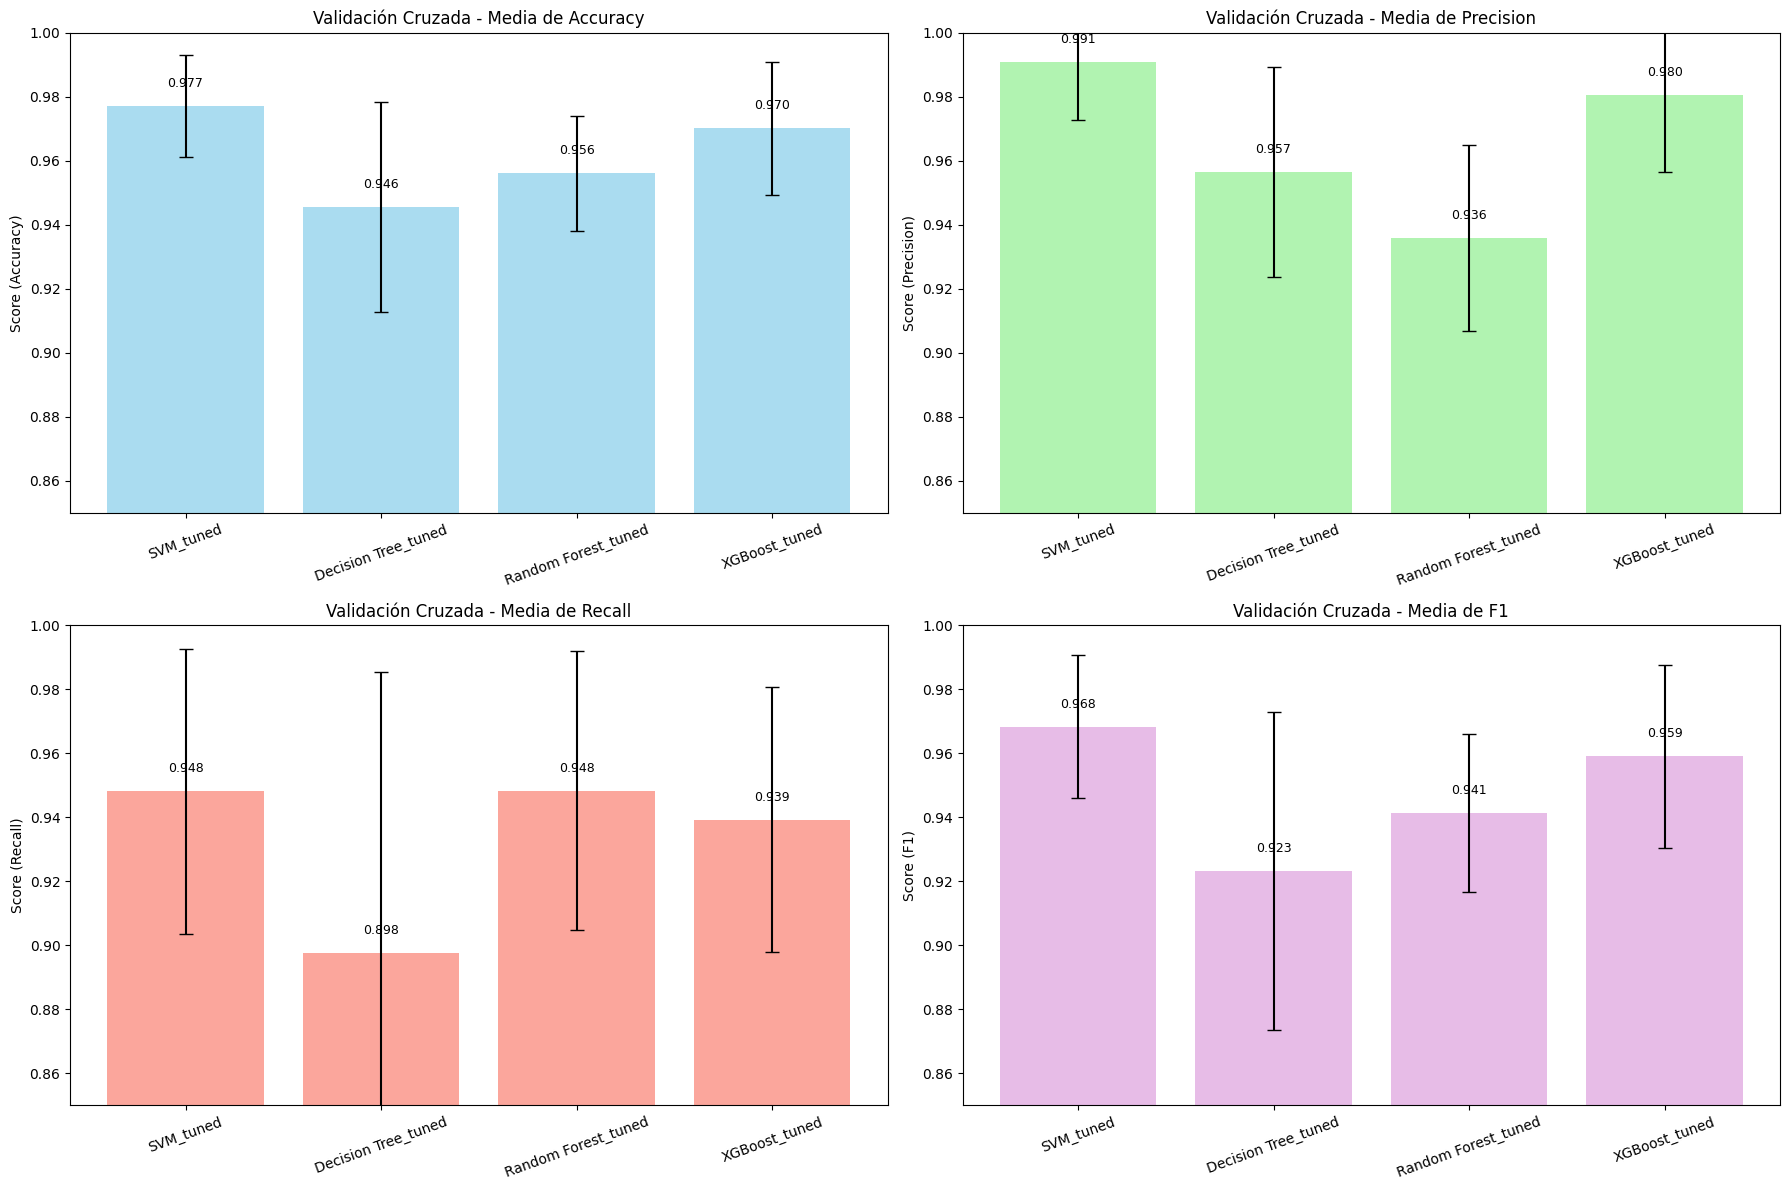

In [ ]:
# VALIDACIÓN CRUZADA PARA TODOS LOS MODELOS OPTIMIZADOS Sebastian Guzman y Andrea Barro

print("\nVALIDACIÓN CRUZADA (10-FOLD) PARA MODELOS OPTIMIZADOS")
print("=" * 70)

# Diccionario para almacenar los resultados de CV
cv_resultados_optimizados = {}

# Definir las métricas a calcular
scoring = ['accuracy', 'precision', 'recall', 'f1']

# Modelos optimizados a evaluar
modelos_optimizados = {
    'SVM_tuned': best_svm,
    'Decision Tree_tuned': best_dt,
    'Random Forest_tuned': best_rf,
    'XGBoost_tuned': best_xgb
}

for nombre_modelo, modelo in modelos_optimizados.items():
    print(f"\nEjecutando validación cruzada para: {nombre_modelo}...")

    # Ejecutar cross-validation
    cv_results = cross_validate(
        estimator=modelo,
        X=X_pca, # Usamos el dataset completo después de PCA
        y=y,     # Usamos el target completo
        cv=10,   # 10 folds
        scoring=scoring,
        n_jobs=-1, # Usar todos los cores disponibles
        return_train_score=False
    )

    # Almacenar resultados
    cv_resultados_optimizados[nombre_modelo] = {}
    for metric in scoring:
        scores = cv_results[f'test_{metric}']
        cv_resultados_optimizados[nombre_modelo][metric] = scores
        cv_resultados_optimizados[nombre_modelo][f'{metric}_mean'] = np.mean(scores)
        cv_resultados_optimizados[nombre_modelo][f'{metric}_std'] = np.std(scores)

    print(f"  Validación cruzada para {nombre_modelo} completada.")
    for metric in scoring:
        mean = cv_resultados_optimizados[nombre_modelo][f'{metric}_mean']
        std = cv_resultados_optimizados[nombre_modelo][f'{metric}_std']
        print(f"    {metric.capitalize():<9}: {mean:.4f} ± {std:.4f}")


print("\nRESUMEN DE RESULTADOS DE VALIDACIÓN CRUZADA")
print("=" * 70)

# Crear DataFrame para mostrar el resumen
summary_data = []
for nombre_modelo, resultados in cv_resultados_optimizados.items():
    row = {'Modelo': nombre_modelo}
    for metric in scoring:
        row[f'{metric.capitalize()} Mean'] = resultados[f'{metric}_mean']
        row[f'{metric.capitalize()} Std'] = resultados[f'{metric}_std']
    summary_data.append(row)

cv_summary_df = pd.DataFrame(summary_data)

# Formatear números
for col in cv_summary_df.columns:
    if 'Mean' in col or 'Std' in col:
        cv_summary_df[col] = cv_summary_df[col].round(4)

print(cv_summary_df.to_string(index=False))

# Visualizar comparación de medias y desviaciones estándar
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
metricas = ['Accuracy', 'Precision', 'Recall', 'F1']
colores = ['skyblue', 'lightgreen', 'salmon', 'plum']
model_names = list(cv_resultados_optimizados.keys())

for i, metrica in enumerate(metricas):
    ax = axes[i//2, i%2]
    means = [cv_resultados_optimizados[m][f'{metrica.lower()}_mean'] for m in model_names]
    stds = [cv_resultados_optimizados[m][f'{metrica.lower()}_std'] for m in model_names]

    ax.bar(model_names, means, yerr=stds, capsize=5, color=colores[i], alpha=0.7)
    ax.set_title(f'Validación Cruzada - Media de {metrica}')
    ax.set_ylabel(f'Score ({metrica})')
    ax.set_ylim(0.85, 1.0) # Ajustar según los resultados esperados
    ax.tick_params(axis='x', rotation=20)

    # Añadir valores medios en las barras
    for bar, mean_val in zip(ax.patches, means):
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005,
                f'{mean_val:.3f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

## 4.3 Curvas ROC y Análisis Gráfico


GENERANDO CURVAS ROC PARA MODELOS OPTIMIZADOS
  Curva ROC calculada para SVM Optimizado (AUC=0.9967)
  Curva ROC calculada para Decision Tree Optimizado (AUC=0.9712)
  Curva ROC calculada para Random Forest Optimizado (AUC=0.9897)
  Curva ROC calculada para XGBoost Optimizado (AUC=0.9907)


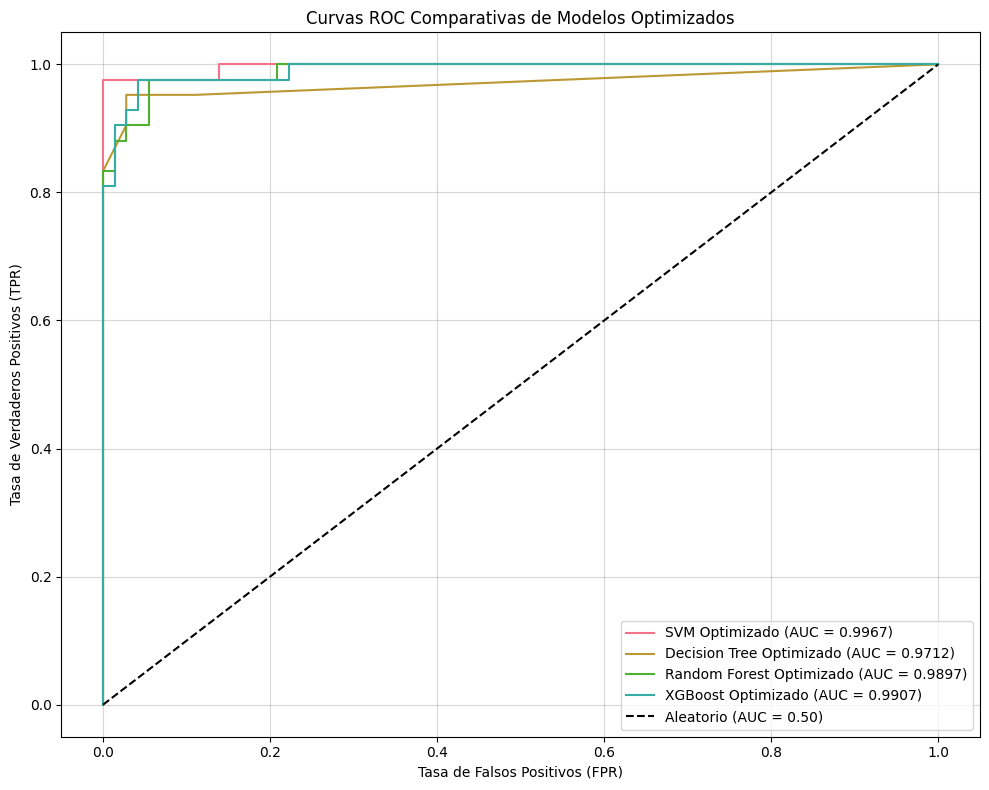


GENERACIÓN DE CURVAS ROC COMPLETADA


In [ ]:
# Realizado por Jose Mesarina
plt.figure(figsize=(10, 8))
print("\nGENERANDO CURVAS ROC PARA MODELOS OPTIMIZADOS")
print("=" * 60)

modelos_roc = {
    'SVM Optimizado': best_svm,
    'Decision Tree Optimizado': best_dt,
    'Random Forest Optimizado': best_rf,
    'XGBoost Optimizado': best_xgb
}

for nombre_modelo, modelo in modelos_roc.items():
    # Necesitamos las probabilidades de predicción para la curva ROC
    # Algunos modelos (como SVM sin probability=True) usan decision_function
    # Otros (como árboles) usan predict_proba
    try:
        if hasattr(modelo, 'predict_proba'):
            y_proba = modelo.predict_proba(X_test)[:, 1]
        elif hasattr(modelo, 'decision_function'):
            y_proba = modelo.decision_function(X_test) # Para SVM lineal o RBF
        else:
            print(f"  Advertencia: El modelo {nombre_modelo} no tiene predict_proba ni decision_function. Saltando ROC.")
            continue

        # Calcular FPR, TPR y umbrales
        fpr, tpr, thresholds = roc_curve(y_test, y_proba)

        # Calcular AUC
        auc = roc_auc_score(y_test, y_proba)

        # Graficar la curva ROC
        plt.plot(fpr, tpr, label=f"{nombre_modelo} (AUC = {auc:.4f})")
        print(f"  Curva ROC calculada para {nombre_modelo} (AUC={auc:.4f})")

    except Exception as e:
        print(f"  Error al calcular o graficar ROC para {nombre_modelo}: {e}")
        continue

# Graficar la línea de referencia aleatoria (AUC=0.5)
plt.plot([0, 1], [0, 1], 'k--', label='Aleatorio (AUC = 0.50)')

plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curvas ROC Comparativas de Modelos Optimizados')
plt.legend(loc='lower right')
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

print("\nGENERACIÓN DE CURVAS ROC COMPLETADA")
print("=" * 60)

# FASE 5: Ensamblado de Modelos Realizado por Rodrigo Cisneros

## 5.1 Voting Classifier

In [ ]:
# Crear ensemble con los mejores modelos Realizado por Rodrigo Cisneros
print(" ENSAMBLADO DE MODELOS")
print("=" * 50)

# Seleccionar los mejores modelos
mejor_svm_model = svm_results[mejor_svm]['modelo'].best_estimator_
xgb_optimizado = best_xgb
rf_base = resultados_modelos['Random Forest']['modelo']

# Crear VotingClassifier
voting_clf = VotingClassifier(
    estimators=[
        ('svm', mejor_svm_model),
        ('xgb', xgb_optimizado),
        ('rf', rf_base)
    ],
    voting='hard'  # Votación por mayoría
)

# Entrenar en datos de PCA para XGBoost y RF, escalados para SVM
print("Entrenando Voting Classifier...")

# Para simplificar, usaremos PCA para todos
voting_clf.fit(X_train, y_train)
y_pred_voting = voting_clf.predict(X_test)

# Evaluar ensemble
accuracy_voting = accuracy_score(y_test, y_pred_voting)
precision_voting = precision_score(y_test, y_pred_voting)
recall_voting = recall_score(y_test, y_pred_voting)
f1_voting = f1_score(y_test, y_pred_voting)

print(" RESULTADOS DEL ENSEMBLE:")
print(f"Accuracy:  {accuracy_voting:.6f}")
print(f"Precision: {precision_voting:.6f}")
print(f"Recall:    {recall_voting:.6f}")
print(f"F1-score:  {f1_voting:.6f}")

print("\nMatriz de confusión del Ensemble:")
print(confusion_matrix(y_test, y_pred_voting))

print("\nReporte de clasificación del Ensemble:")
print(classification_report(y_test, y_pred_voting, target_names=['Benigno', 'Maligno']))

 ENSAMBLADO DE MODELOS
Entrenando Voting Classifier...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [02:01:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


 RESULTADOS DEL ENSEMBLE:
Accuracy:  0.964912
Precision: 0.952381
Recall:    0.952381
F1-score:  0.952381

Matriz de confusión del Ensemble:
[[70  2]
 [ 2 40]]

Reporte de clasificación del Ensemble:
              precision    recall  f1-score   support

     Benigno       0.97      0.97      0.97        72
     Maligno       0.95      0.95      0.95        42

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



## 5.2 Comparación Final de Todos los Modelos


TABLA COMPARATIVA FINAL DE TODOS LOS MODELOS
                    Modelo  Accuracy  Precision  Recall  F1-Score
          SVM (Optimizado)    0.9825     1.0000  0.9524    0.9756
            XGBoost (Base)    0.9737     1.0000  0.9286    0.9630
                SVM (Base)    0.9649     0.9750  0.9286    0.9512
         Ensemble (Voting)    0.9649     0.9524  0.9524    0.9524
Decision Tree (Optimizado)    0.9649     0.9524  0.9524    0.9524
Random Forest (Optimizado)    0.9474     0.9500  0.9048    0.9268
      XGBoost (Optimizado)    0.9474     0.9286  0.9286    0.9286
      Random Forest (Base)    0.9386     0.9268  0.9048    0.9157
      Decision Tree (Base)    0.9211     0.9024  0.8810    0.8916

El mejor modelo global (por Accuracy en el conjunto de prueba) es: SVM (Optimizado) con Accuracy = 0.9825

VISUALIZACIÓN FINAL DE RENDIMIENTO


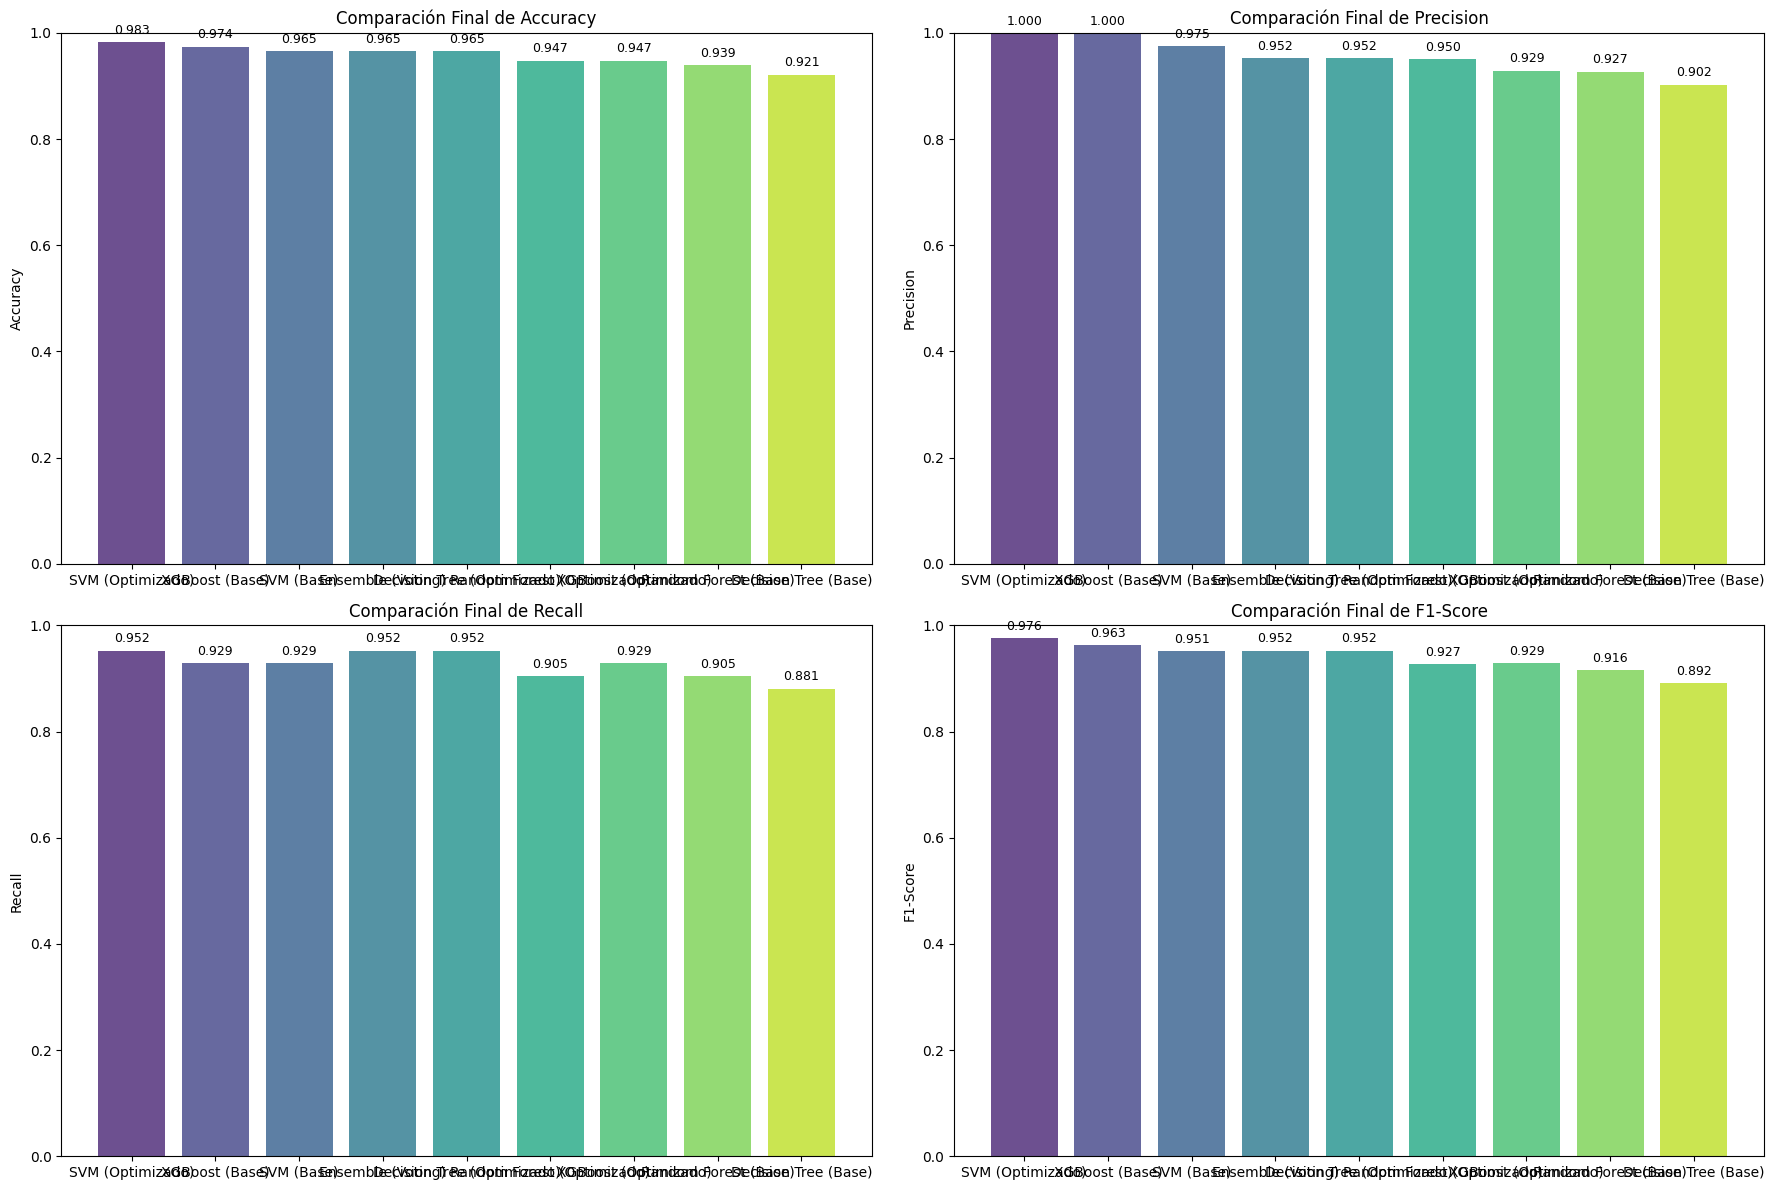


ANÁLISIS FINAL COMPLETADO


In [ ]:
# Tabla final comparativa de todos los modelos (base, optimizados y ensemble) Realizado por todos los integrantes
print("\nTABLA COMPARATIVA FINAL DE TODOS LOS MODELOS")
print("=" * 70)

# Recopilar resultados de todos los modelos de interés
final_results_data = []

# Añadir modelos base
for name, res in resultados_modelos.items():
    if 'tuned' not in name: # Excluir los 'tuned' para no duplicar si se usan en ensemble
       final_results_data.append({
           'Modelo': f"{name} (Base)",
           'Accuracy': res['accuracy'],
           'Precision': res['precision'],
           'Recall': res['recall'],
           'F1-Score': res['f1']
       })

# Añadir modelos optimizados (si no se incluyeron antes o si queremos ver la mejora explícitamente)
# Asegurarse de que los nombres sean distintivos si se usan en el ensemble
final_results_data.append({
    'Modelo': "SVM (Optimizado)", # Usamos el nombre optimizado
    'Accuracy': resultados_modelos['SVM_tuned']['accuracy'],
    'Precision': resultados_modelos['SVM_tuned']['precision'],
    'Recall': resultados_modelos['SVM_tuned']['recall'],
    'F1-Score': resultados_modelos['SVM_tuned']['f1']
})
final_results_data.append({
    'Modelo': "Decision Tree (Optimizado)",
    'Accuracy': resultados_modelos['Decision Tree_tuned']['accuracy'],
    'Precision': resultados_modelos['Decision Tree_tuned']['precision'],
    'Recall': resultados_modelos['Decision Tree_tuned']['recall'],
    'F1-Score': resultados_modelos['Decision Tree_tuned']['f1']
})
final_results_data.append({
    'Modelo': "Random Forest (Optimizado)",
    'Accuracy': resultados_modelos['Random Forest_tuned']['accuracy'],
    'Precision': resultados_modelos['Random Forest_tuned']['precision'],
    'Recall': resultados_modelos['Random Forest_tuned']['recall'],
    'F1-Score': resultados_modelos['Random Forest_tuned']['f1']
})
final_results_data.append({
    'Modelo': "XGBoost (Optimizado)",
    'Accuracy': resultados_modelos['XGBoost_tuned']['accuracy'],
    'Precision': resultados_modelos['XGBoost_tuned']['precision'],
    'Recall': resultados_modelos['XGBoost_tuned']['recall'],
    'F1-Score': resultados_modelos['XGBoost_tuned']['f1']
})


# Añadir resultado del Ensemble
final_results_data.append({
    'Modelo': "Ensemble (Voting)",
    'Accuracy': accuracy_voting,
    'Precision': precision_voting,
    'Recall': recall_voting,
    'F1-Score': f1_voting
})


final_results_df = pd.DataFrame(final_results_data)

# Formatear números
for col in ['Accuracy', 'Precision', 'Recall', 'F1-Score']:
    final_results_df[col] = final_results_df[col].round(4)

# Ordenar por Accuracy
final_results_df = final_results_df.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)

print(final_results_df.to_string(index=False))

# Identificar el mejor modelo global
mejor_modelo_global = final_results_df.loc[0, 'Modelo']
mejor_accuracy_global = final_results_df.loc[0, 'Accuracy']
print(f"\nEl mejor modelo global (por Accuracy en el conjunto de prueba) es: {mejor_modelo_global} con Accuracy = {mejor_accuracy_global:.4f}")


# Visualización final de la tabla comparativa
print("\nVISUALIZACIÓN FINAL DE RENDIMIENTO")
print("=" * 60)

fig, axes = plt.subplots(2, 2, figsize=(18, 12))
metricas = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
colores = sns.color_palette("viridis", n_colors=len(final_results_df)) # Usar una paleta para diferenciar modelos

for i, metrica in enumerate(metricas):
    ax = axes[i//2, i%2]
    bars = ax.bar(final_results_df['Modelo'], final_results_df[metrica], color=colores, alpha=0.8)
    ax.set_title(f'Comparación Final de {metrica}')
    ax.set_ylabel(metrica)
    ax.set_ylim(0, 1)


    # Añadir valores en las barras
    for bar, valor in zip(bars, final_results_df[metrica]):
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                f'{valor:.3f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

print("\nANÁLISIS FINAL COMPLETADO")
print("=" * 60)